<a href="https://colab.research.google.com/github/johnboscoimmanuel/PRACTICE/blob/main/loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
train=pd.read_csv('/content/train_ctrUa4K.csv')

test=pd.read_csv('/content/test_lAUu6dG.csv')

In [4]:
train_original=train.copy()

test_original=test.copy()

In [5]:
train_original.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
test_original.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
train_original.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
test_original.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [9]:
train_original.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
train_original.shape,test_original.shape

((614, 13), (367, 12))

##Univariate Analysis

In [11]:
train_original['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

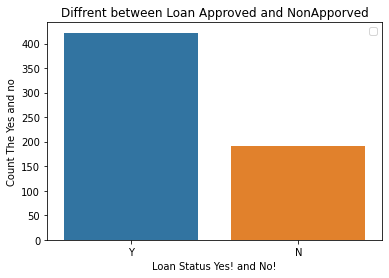

In [12]:
sns.countplot(train_original['Loan_Status'])
plt.title('Diffrent between Loan Approved and NonApporved')
plt.xlabel('Loan Status Yes! and No!')
plt.ylabel('Count The Yes and no')
plt.legend()
plt.show()


In [13]:

train_original['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

 **Categorical Features**
 

*   Gender
*   Married
*    Self_Employed
*   Loan Status # This Target Variable

**Ordinal Features**
* Dependents	
*Education
*Area Property

**Numerical Features**
* Applicant Income
* Coapplicant Income
* Loan Amount
* Loan Amount Terms



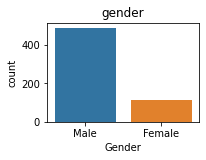

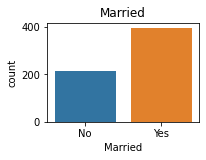

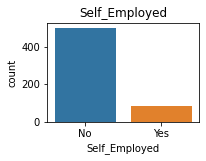

In [14]:
# Indipent variable (Categoricals)
plt.figure(1)
plt.subplot(222)
sns.countplot(train['Gender'])
plt.title('gender')
plt.show()
plt.subplot(223)
sns.countplot(train['Married'])
plt.title('Married')
plt.show()
plt.subplot(224)
sns.countplot(train['Self_Employed'])
plt.title('Self_Employed')
plt.show()

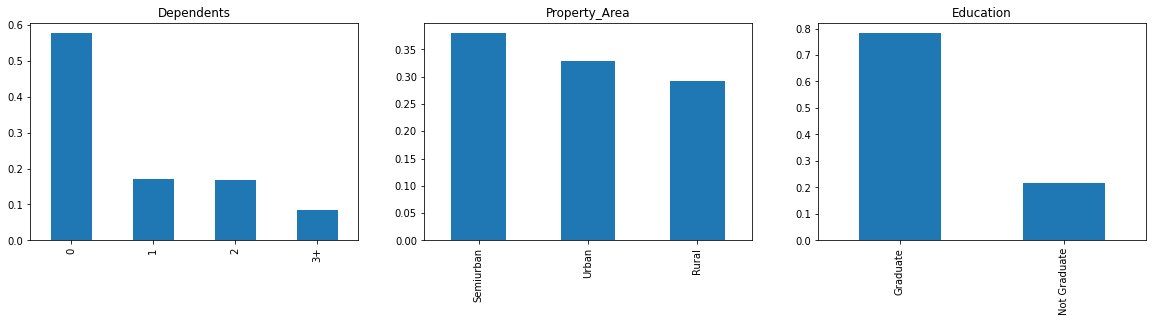

In [15]:
plt.figure(1) 
plt.subplot(131)

train['Dependents'].value_counts(normalize=True).plot(kind='bar',title='Dependents',figsize=(20,4))

plt.subplot(132)
train['Property_Area'].value_counts(normalize=True).plot(kind='bar',title='Property_Area')

plt.subplot(133)
train['Education'].value_counts(normalize=True).plot(kind='bar',title='Education')
plt.show()

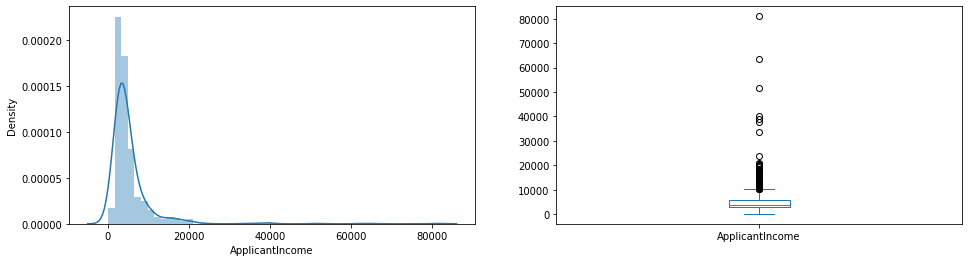

In [16]:
# Indipent variable (Numericals)
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot(kind='box',figsize=(16,4))
plt.show()


Text(0.5, 0.98, '---')

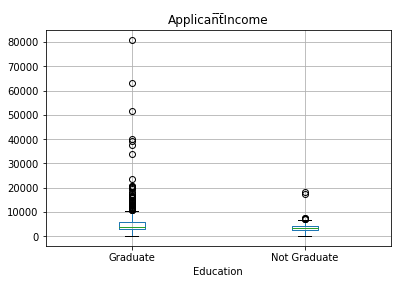

In [17]:
train.boxplot(column=['ApplicantIncome'],by='Education')
plt.suptitle('---')

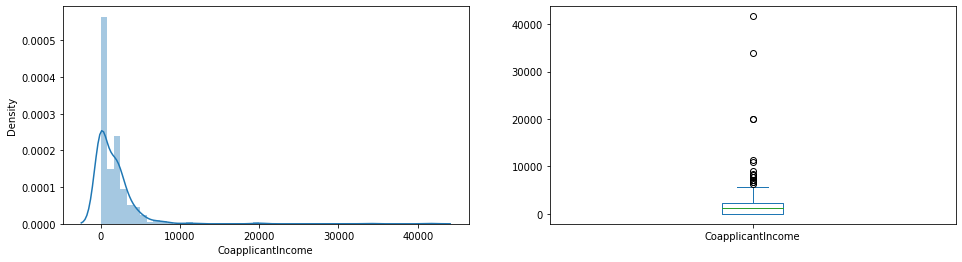

In [18]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot(kind='box',figsize=(16,4))
plt.show()

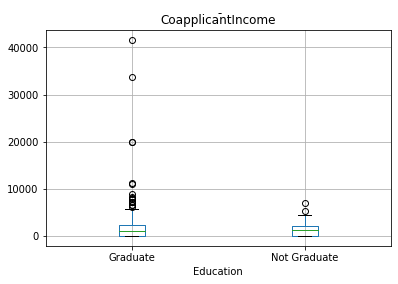

In [19]:
train.boxplot(column=['CoapplicantIncome'],by='Education')
plt.suptitle(' -')
plt.show()

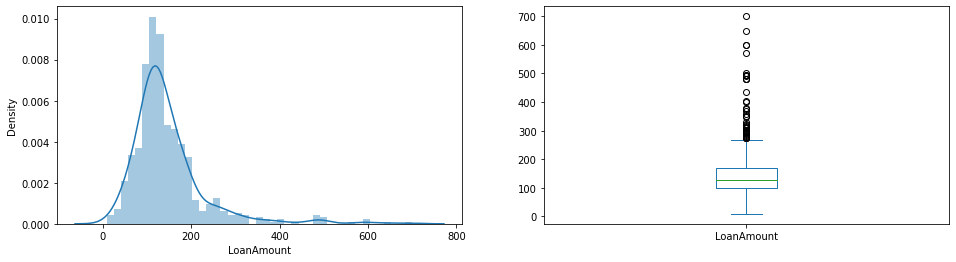

In [20]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['LoanAmount'])
plt.subplot(122)
train['LoanAmount'].plot(kind='box',figsize=(16,4))
plt.show()

**Bivariate Analysis**

<AxesSubplot:xlabel='Gender'>

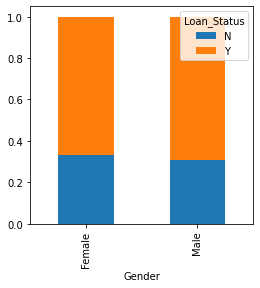

In [21]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',figsize=(4,4),stacked=True)

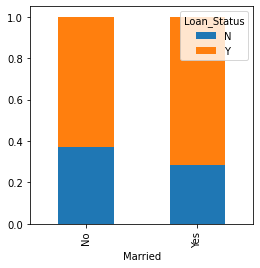

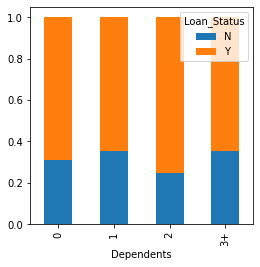

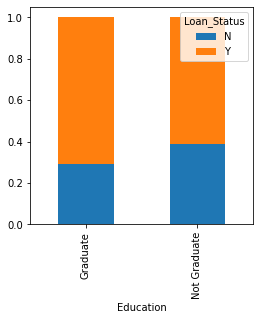

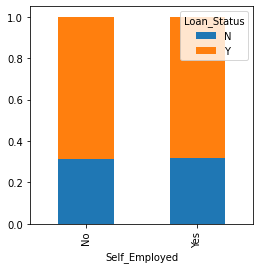

In [22]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])

Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',figsize=(4,4),stacked=True)
plt.show()

Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',figsize=(4,4),stacked=True)
plt.show()

Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',figsize=(4,4),stacked=True)
plt.show()

Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',figsize=(4,4),stacked=True)
plt.show()

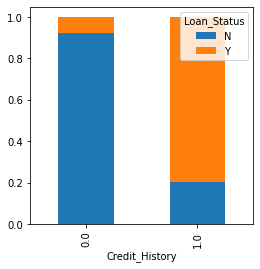

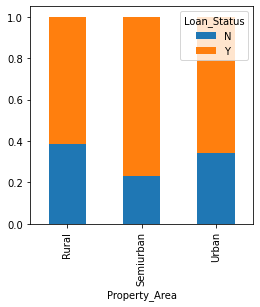

In [23]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar',figsize=(4,4),stacked=True)
plt.show()
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar',figsize=(4,4),stacked=True)
plt.show()



In [24]:
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)

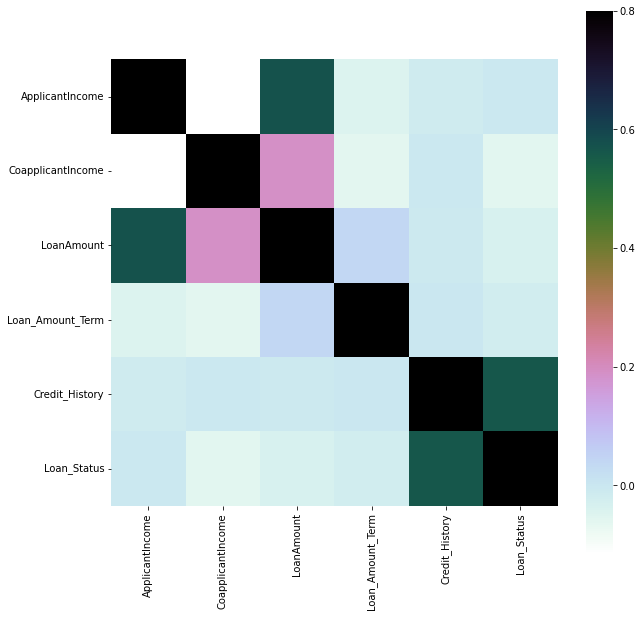

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),square=True,cmap='cubehelix_r',vmax=.8)
plt.show()

**Missing Value and Outlier Treatment**

**Missing Value Imputation**

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


In [27]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

* Numerical Variable    -----> Mean , Median using for Imputation
* Categorical Variable  ----> mode using to Imputation

In [28]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train.Married.mode()[0],inplace=True)
train['Dependents'].fillna(train.Dependents.mode()[0],inplace=True)
train['Self_Employed'].fillna(train.Self_Employed.mode()[0],inplace=True)



In [29]:
train['LoanAmount'].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [30]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [31]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)
train['Credit_History'].fillna(train.Credit_History.mode()[0],inplace=True)
train.Loan_Amount_Term.fillna(train.Loan_Amount_Term.mode()[0],inplace=True)


In [32]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

** Fill all the Missing Value in test Dataset to same approch**

In [33]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [34]:
test['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [35]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**Outlier Treatment**

<AxesSubplot:xlabel='LoanAmount'>

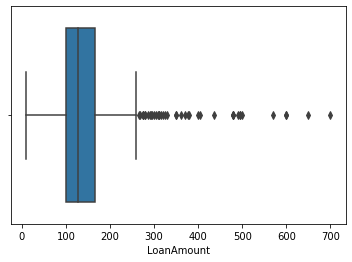

In [36]:
sns.boxplot(train['LoanAmount'])

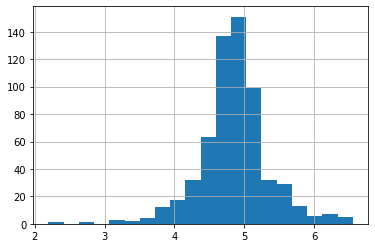

In [37]:
train['LoanAmount_Log']=np.log(train['LoanAmount'])
train['LoanAmount_Log'].hist(bins=20)
test['LoanAmount_log']=np.log(test['LoanAmount'])

In [38]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_Log'],
      dtype='object')

In [39]:
train=train.drop(['Loan_ID'],axis=1)
test=test.drop(['Loan_ID'],axis=1)

In [40]:
x=train.drop(['Loan_Status'],axis=1)

y=train['Loan_Status']

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

In [42]:
x=pd.get_dummies(x)

In [43]:
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

model=LogisticRegression()

model.fit(x_train,y_train)

LogisticRegression()

In [45]:
train_y_pred=model.predict(x_train)
print('Training accuracy_score : ',round(accuracy_score(y_train,train_y_pred),4))


Training accuracy_score :  0.7902


In [46]:
y_pred=model.predict(x_test)
print(' Test accuracy_score : ',round(accuracy_score(y_test,y_pred),4))

 Test accuracy_score :  0.8537
